In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ase.io as aseio
from ase import Atoms
from ase.geometry.analysis import Analysis
from ase.neighborlist import neighbor_list
from ase.visualize import view
import os

In [2]:
r = np.array(np.load("tmp/r.npy", allow_pickle=True))
rdf_OO = np.array(np.load("tmp/rdf_OO.npy", allow_pickle=True))

ValueError: x and y must have same first dimension, but have shapes (138,) and (276,)

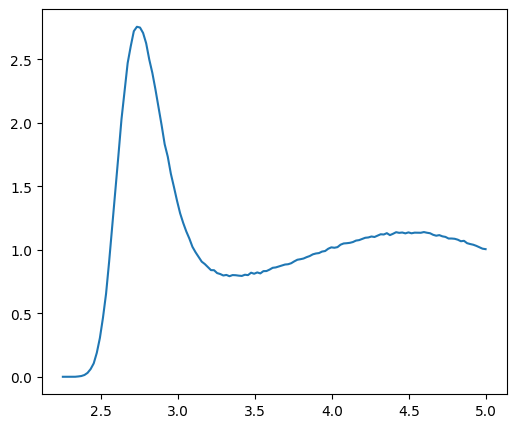

In [4]:
fig, ax = plt.subplots(figsize=(6, 5))

ax.plot(r,np.mean(rdf_OO,axis=0),label=r'Dynamical Simulation')

reference = np.load('../../../experiment/gdr/target.npy')
# r_ref = np.arange(0.01, 4.99, 0.02)
ax.plot(r, reference, label='Reference', color='red')

rdf_OO_mean = np.mean(rdf_OO,axis=0)
rmax = r[np.argmax(rdf_OO_mean)]
rmax_ref = r[np.argmax(reference)]
max_rdf = np.max(rdf_OO_mean)
ax.plot(rmax, max_rdf, marker='o', markersize=3, color='orange', alpha=0.8)
ax.text(rmax+0.1, max_rdf+0.1, f'({rmax:.3f}, {max_rdf:.4f})', fontsize=12, color='orange')

ax.axhline(1.0, linestyle=(0,(5,5)), color='Gray',linewidth=1)
ax.legend(loc='best', fontsize=11, frameon=False,)
ax.set_ylim([0,3])
ax.set_xlim([0,5])

ax.set_xlabel(r'$r \:(\mathrm{\AA})$', fontsize=(18))
ax.set_ylabel(r'$g_{OO}(r)$', fontsize=(18))

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position("left")
ax.xaxis.set_ticks_position("bottom")

r_points = np.array([rmax - 0.06, rmax, rmax_ref, rmax_ref + 0.06])

plt.savefig('gdr.png',dpi=300)
plt.show()

In [4]:
rdf = np.array(rdf_OO)
np.savetxt('observable.raw', rdf[:,:])
np.savetxt('gdr-distance.data', r, fmt='%.2f')